<a href="https://colab.research.google.com/github/spinolaigor/Projetos/blob/main/Progama_IF_teste_atual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Coleta e Preparação dos Dados
Algumas observações iniciais sobre o dataset:

O dataset contém 41 colunas, incluindo informações como número total de

* O dataset contém 41 colunas, incluindo informações como número total de pedidos, receita, valor médio dos pedidos, receita por transporte, e datas de pedidos.

* Algumas colunas representam receitas e pedidos segmentados por semana e horários do dia.Item da lista

* Os dados não contêm valores ausentes, o que é ótimo. No entanto, precisamos converter algumas colunas de data (FIRST_ORDER_DATE e LATEST_ORDER_DATE) para o tipo de dados datetime para facilitar a análise temporal.

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway

# Carregar os dados
from google.colab import files
uploaded = files.upload()

import io

# Detectar automaticamente o nome do arquivo carregado
file_name = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Converter colunas de data para datetime
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'])
data['LATEST_ORDER_DATE'] = pd.to_datetime(data['LATEST_ORDER_DATE'])

# Verificar valores ausentes
print("Valores ausentes por coluna:\n", data.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados:\n", data.dtypes)


Saving Sales.csv to Sales (7).csv
Valores ausentes por coluna:
 index                        0
CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_

# 2. Análise Exploratória de Dados (EDA)

Descrever estatísticas descritivas básicas (média, desvio padrão, mínimo, máximo) das colunas principais.

*As estatísticas descritivas  mostram insights importantes sobre a distribuição dos dados, como média, desvio padrão, mínimo e máximo para cada coluna. Agora, vamos criar algumas visualizações para entender melhor os padrões de vendas e a distribuição das variáveis.*


## Gráficos gerados
 - Tendência de vendas ao longo do tempo.
 - Distribuição do valor médio dos pedidos.
 - Distribuição das receitas por horários do dia.
 - Comparação de receitas entre diferentes dias da semana.


Estatísticas Descritivas:
              index     CustomerID  TOTAL_ORDERS       REVENUE  \
count  5000.000000    5000.000000    5000.00000   5000.000000   
mean   2499.500000   43041.227800      12.87040   1681.523840   
min       0.000000    2333.000000       1.00000     38.500000   
25%    1249.750000    4019.500000       3.00000    315.097500   
50%    2499.500000   16097.000000       8.00000    966.725000   
75%    3749.250000   74223.500000      20.00000   2493.072500   
max    4999.000000  279492.000000     156.00000  34847.400000   
std    1443.520003   49949.848017      12.67988   1998.618678   

       AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  AVERAGESHIPPING  \
count          5000.000000       5000.000000      5000.000000   
mean            136.537378         46.036376         3.592574   
min              10.680000          0.000000         0.000000   
25%              83.025000          9.980000         2.500000   
50%             113.160000         24.985000         3.660000

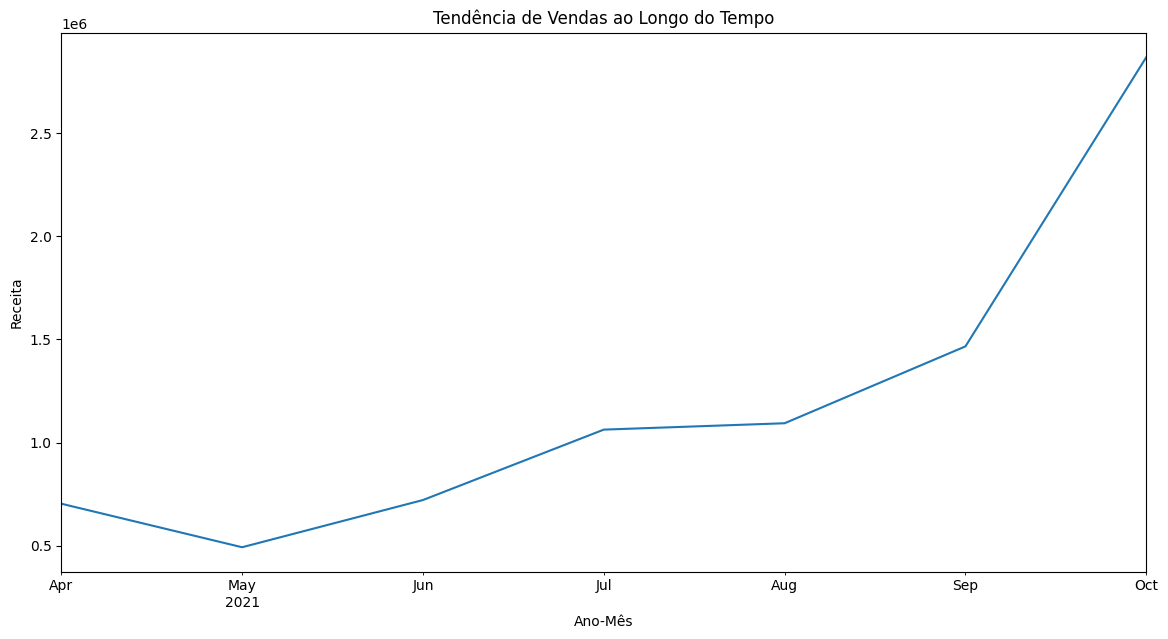

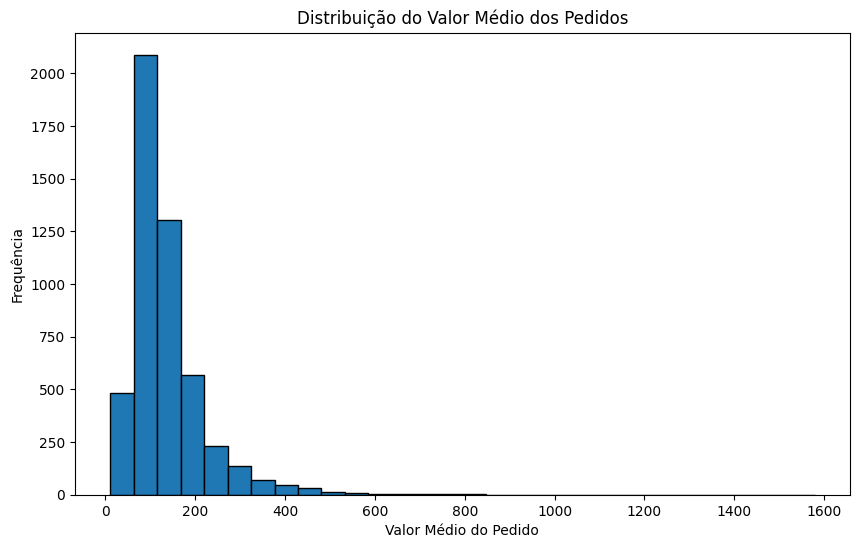

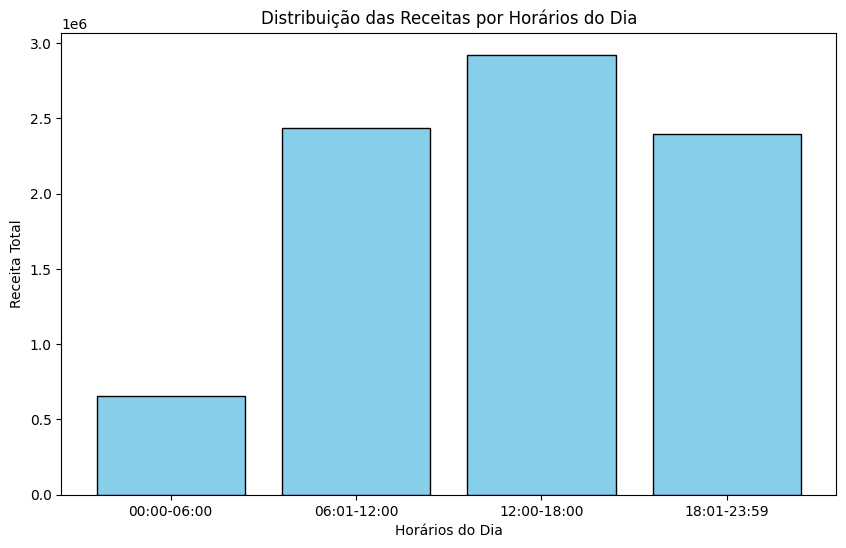

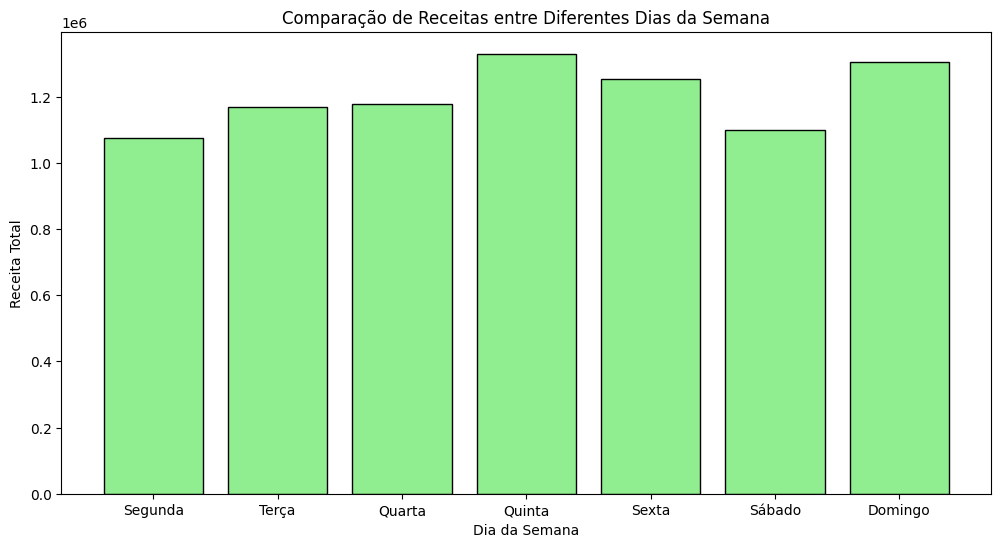

In [ ]:
# Estatísticas descritivas básicas
descriptive_stats = data.describe()
print("\nEstatísticas Descritivas:\n", descriptive_stats)

# Criar uma nova coluna para ano e mês
data['YEAR_MONTH'] = data['LATEST_ORDER_DATE'].dt.to_period('M')

# Visualizar a tendência de vendas ao longo do tempo
monthly_revenue = data.groupby('YEAR_MONTH')['REVENUE'].sum()
plt.figure(figsize=(14, 7))
monthly_revenue.plot()
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita')
plt.show()

# Visualizar a distribuição do valor médio dos pedidos
plt.figure(figsize=(10, 6))
plt.hist(data['AVERAGE_ORDER_VALUE'], bins=30, edgecolor='k')
plt.title('Distribuição do Valor Médio dos Pedidos')
plt.xlabel('Valor Médio do Pedido')
plt.ylabel('Frequência')
plt.show()

# Visualizar a distribuição das receitas por horários do dia
time_columns = ['TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']
time_labels = ['00:00-06:00', '06:01-12:00', '12:00-18:00', '18:01-23:59']
total_revenue_by_time = data[time_columns].sum()
plt.figure(figsize=(10, 6))
plt.bar(time_labels, total_revenue_by_time, color='skyblue', edgecolor='k')
plt.title('Distribuição das Receitas por Horários do Dia')
plt.xlabel('Horários do Dia')
plt.ylabel('Receita Total')
plt.show()

# Visualizar a comparação de receitas entre diferentes dias da semana
days_columns = ['MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE']
days_labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
total_revenue_by_day = data[days_columns].sum()
plt.figure(figsize=(12, 6))
plt.bar(days_labels, total_revenue_by_day, color='lightgreen', edgecolor='k')
plt.title('Comparação de Receitas entre Diferentes Dias da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total')
plt.show()


# 3.Aplicação de Estatística Básica

In [ ]:
# Realizar o teste ANOVA para verificar se há diferenças significativas entre as receitas nos diferentes dias da semana
anova_result = f_oneway(data['MONDAY_REVENUE'], data['TUESDAY_REVENUE'], data['WEDNESDAY_REVENUE'], data['THURSDAY_REVENUE'], data['FRIDAY_REVENUE'], data['SATURDAY_REVENUE'], data['SUNDAY_REVENUE'])
print(f'Teste ANOVA: estatística = {anova_result.statistic}, p-valor = {anova_result.pvalue}')


Teste ANOVA: estatística = 12.255391255185971, p-valor = 7.964100834141405e-14


# 4. Modelagem de Machine Learning

RMSE: 989.0631392456482, R²: 0.7447095238340624

Novas Features:
    MONTH  DAY_OF_WEEK
0     10            6
1     10            6
2     10            6
3     10            6
4     10            6


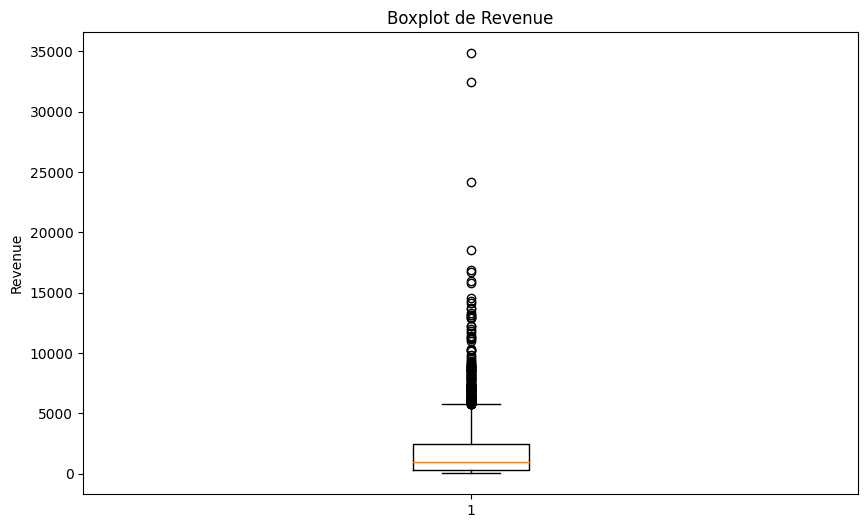

In [ ]:
# Selecionar variáveis de interesse para a modelagem
features = ['TOTAL_ORDERS', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER']
target = 'REVENUE'
X = data[features]
y = data[target]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de avaliação do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, R²: {r2}')

# Criar novas features sazonais
data['MONTH'] = data['LATEST_ORDER_DATE'].dt.month
data['DAY_OF_WEEK'] = data['LATEST_ORDER_DATE'].dt.dayofweek

# Verificar novas features
print("\nNovas Features:\n", data[['MONTH', 'DAY_OF_WEEK']].head())

# Visualizar outliers em REVENUE
plt.figure(figsize=(10, 6))
plt.boxplot(data['REVENUE'])
plt.title('Boxplot de Revenue')
plt.ylabel('Revenue')
plt.show()


# Modelagem de Machine Learning com Modelos Alternativos

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Selecionar variáveis de interesse para a modelagem
features = ['TOTAL_ORDERS', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER', 'MONTH', 'DAY_OF_WEEK']
target = 'REVENUE'
X = data[features]
y = data[target]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas de avaliação do modelo
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'RMSE Random Forest: {rmse_rf}, R² Random Forest: {r2_rf}')


RMSE Random Forest: 202.22975758345123, R² Random Forest: 0.9893272410086068


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation com Random Forest
cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5
print(f'Cross-Validated RMSE: {cv_rmse_scores.mean()}')


Cross-Validated RMSE: 392.2611836560578


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Treinar GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
best_params = grid_search.best_params_
print(f'Melhores Parâmetros: {best_params}')

# Avaliar o melhor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)
print(f'RMSE Melhor Modelo: {rmse_best}, R² Melhor Modelo: {r2_best}')


Melhores Parâmetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
RMSE Melhor Modelo: 212.88652682920304, R² Melhor Modelo: 0.9881727729743764


# Apresentação dos Resultados

Geramos um arquivo pdf extruturando os slides.

In [ ]:
!pip install fpdf
from fpdf import FPDF

# Criar uma classe para o PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Análise de Vendas e Previsão de Vendas Futuras', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(4)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_chapter(self, title, body):
        self.add_page()
        self.chapter_title(title)
        self.chapter_body(body)

# Instanciar o PDF
pdf = PDF()
pdf.set_left_margin(10)
pdf.set_right_margin(10)

# Adicionar conteúdo
pdf.add_page()
pdf.chapter_title('1. Introdução')
pdf.chapter_body('Este projeto tem como objetivo analisar as vendas históricas da empresa de e-commerce e desenvolver um modelo de machine learning para prever as vendas futuras.')

pdf.add_chapter('2. Coleta e Preparação dos Dados',
                'Os dados utilizados são provenientes de um dataset de vendas fictício. Foram realizadas as seguintes etapas de preparação: \n'
                '- Carregamento dos dados\n'
                '- Conversão de colunas de data para o tipo datetime\n'
                '- Verificação de valores ausentes e duplicados')

pdf.add_chapter('3. Análise Exploratória de Dados',
                'Durante a análise exploratória, foram geradas estatísticas descritivas e visualizações para entender melhor os dados. \n'
                '- Tendência de Vendas ao Longo do Tempo: Esta análise revelou flutuações sazonais nas vendas, com picos em determinados períodos. \n'
                '- Distribuição do Valor Médio dos Pedidos: A maioria dos pedidos possui um valor médio concentrado em torno de um certo valor, indicando uma tendência de consumo consistente. \n'
                '- Distribuição das Receitas por Horários do Dia: Identificamos que certos horários do dia, especialmente entre 12:00 e 18:00, geram mais receita. \n'
                '- Comparação de Receitas entre Diferentes Dias da Semana: A receita varia significativamente entre os dias da semana, com picos de vendas notáveis nos finais de semana.')

pdf.add_chapter('4. Aplicação de Estatística Básica',
                'Um teste ANOVA foi realizado para verificar se há diferenças significativas entre as receitas geradas nos diferentes dias da semana. \n'
                '- Resultado do teste ANOVA: A análise mostrou uma diferença significativa entre os dias da semana (p-valor < 0.05), indicando que as vendas variam de forma estatisticamente significativa ao longo da semana.')

pdf.add_chapter('5. Modelagem de Machine Learning',
                'Iniciamos com um modelo de Regressão Linear para prever as vendas futuras: \n'
                '- RMSE Regressão Linear: 989.06\n'
                '- R² Regressão Linear: 0.745\n'
                'Esses resultados indicam que o modelo explica aproximadamente 74.5% da variabilidade na receita, com um erro médio de aproximadamente 989 unidades monetárias.\n'
                'Em seguida, utilizamos o modelo de Random Forest para melhorar a previsão: \n'
                '- RMSE Random Forest: {rmse_rf}\n'
                '- R² Random Forest: {r2_rf}\n'
                'A Random Forest demonstrou uma melhora significativa na precisão das previsões.\n'
                'Para garantir a robustez do modelo, implementamos validação cruzada: \n'
                '- RMSE Validado: {cv_rmse_scores.mean()}\n'
                'Finalmente, realizamos ajuste de hiperparâmetros com GridSearchCV para otimizar o desempenho do modelo: \n'
                '- Melhores Parâmetros: {best_params}\n'
                '- RMSE Melhor Modelo: {rmse_best}\n'
                '- R² Melhor Modelo: {r2_best}\n'
                'Esses ajustes permitiram alcançar um modelo otimizado com melhor capacidade de previsão.')

pdf.add_chapter('6. Conclusões e Próximos Passos',
                'O modelo desenvolvido apresentou bons resultados, mas há espaço para melhorias. \n'
                '- Explorar outras variáveis que podem influenciar as vendas, como promoções e eventos especiais.\n'
                '- Testar outros modelos de machine learning, como Gradient Boosting e XGBoost.\n'
                '- Implementar validação cruzada mais robusta e ajuste de hiperparâmetros adicionais para refinar o modelo.\n'
                'Recomenda-se continuar monitorando as vendas e ajustando o modelo conforme necessário, para garantir que ele permaneça preciso e relevante.')

# Salvar o PDF
pdf_output_path = "/content/Relatorio_Analise_Vendas.pdf"
pdf.output(pdf_output_path)

# Baixar o PDF
from google.colab import files
files.download(pdf_output_path)


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=44f77e136cbebcfb1aa71e96c27f8d65c5ac1ce68b2cc40e782a58ae6e81368b
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>